# Classification with Logistic Regression
Loading the packages we will use

In [39]:
using Pkg
Pkg.add("MLBase")

    Updating registry at `C:\Users\PC\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\PC\.julia\environments\v1.7\Project.toml`
  [f0e99cf1] + MLBase v0.9.0
    Updating `C:\Users\PC\.julia\environments\v1.7\Manifest.toml`
  [f0e99cf1] + MLBase v0.9.0


In [40]:
using CSV
using Plots
using DataFrames
using MLBase

Plotting the logistic curve wich function is:
$$  f(x) = \frac{1}{1+e^{-x}}  $$

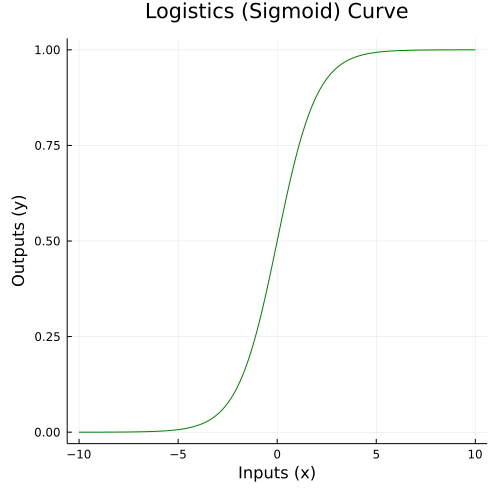

In [26]:
gr(size = (500,500))

logistic(x) = 1/(1+exp(-x))

plot(-10.0:0.1:10, logistic,
xlabel = "Inputs (x)",
ylabel = "Outputs (y)",
title = "Logistics (Sigmoid) Curve",
legend = false,
color = :green)

Moidfying the logistic curve to use the minimization method of batch gradient descendent.\
Initializing parameters

In [28]:
θ_0 = -0.0; #y-intercept (default = 0| try 1 & -1)
θ_1 = 1.0; #slope (default = 1| try -0.5 & 0.5)

Defining the hypothesis function $h(x)$ and we subsitute $x$ to the linear function $z(x)$ 

In [21]:
z(x) = θ_0.+θ_1*x;
h(x) = 1 ./(1 .+exp.(-z(x)));

Now we plot this new logistic curve

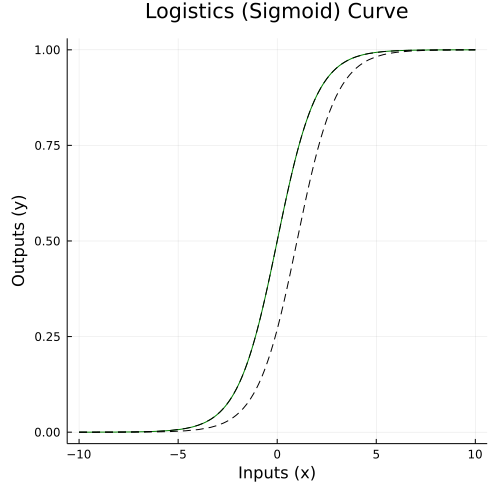

In [29]:
plot!(h, color = :black, linestyle = :dash)

Now let us load the dataset for this project

In [51]:
DF = DataFrame(CSV.File("wolfspider.csv"))
describe(DF)
LabelMap = labelmap(DF.class)
Y = labelencode(LabelMap,DF.class);
X = DF.feature;

Plotting the scatter of the data

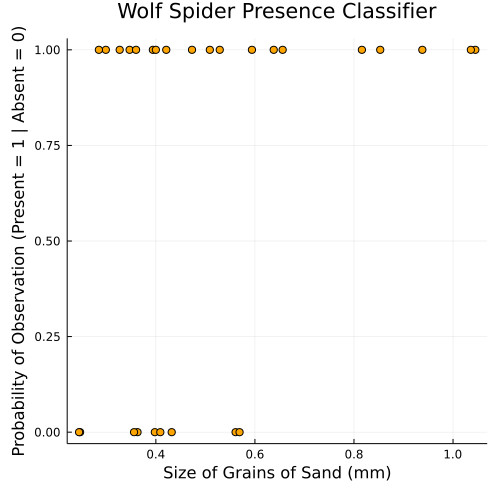

In [66]:
Data = scatter(X, Y.-1,
xlabel = "Size of Grains of Sand (mm)",
ylabel = "Probability of Observation (Present = 1 | Absent = 0)",
title = "Wolf Spider Presence Classifier",
legend = false,
color = :orange, 
merkersize = 5)

For implementing the optimization algorithm (Batch Gradient Descendent) we initialize paramters and we will track the change of them

In [101]:
θ_0 = 0.0
θ_1 = 1.0
t0_history = []
t1_history = []
push!(t0_history,θ_0)
push!(t1_history,θ_1)

z(x) = θ_0.+θ_1*x;
h(x) = 1 ./(1 .+exp.(-z(x)))

h (generic function with 1 method)

Adding the intial Sigmoid Curve to the scatter plot

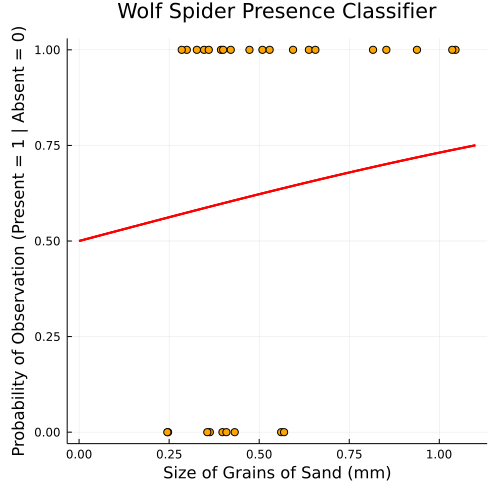

In [102]:
plot!(0:0.01:1.1, h, label = "Logistic Curve", linewidth = 2, color = :red)

Defining the cost function:
$$ J(\theta_0, \theta_1)=
-\frac{1}{m}\sum_{i=1}^m( y^{(i)}\log h_\theta(x^{(i)})+(1-y^{(i)})\log(1-h_\theta(x^{(i)})))  $$

In [103]:
m = length(X)
ŷ = h(X)

function cost()
    (-1 / m) * sum(
        Y .* log.(ŷ) +
        (1 .- Y) .* log.(1 .- ŷ)
    )
end

J = cost()


0.08321344892559551

Now for implement the algorithm we do the partial derivatives of the cost function
$$\partial_{\theta_0}J=\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})$$ 
and $$\partial_{\theta_1}J=\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [104]:
function pd_t0()
    sum(ŷ-Y) 
end

function pd_t1()
    sum((ŷ-Y) .*X) 
end

pd_t1 (generic function with 1 method)

setting learning rate, and intializin epochs, also we calculate the partial derivatives, and we star the algorithm and putting it into a loop untill it convege

In [111]:
α = 0.01;
epochs = 0

0

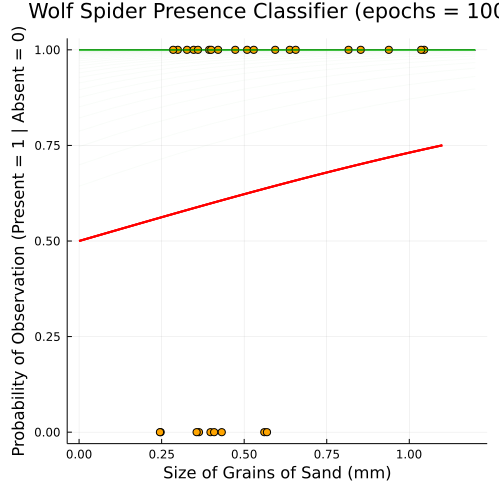

In [112]:
for i = 0:1000
    p_t0 = pd_t0();
    p_t1 = pd_t1();

    θ_0 -= α * p_t0
    θ_1 -= α * p_t1

    J_history = []
    push!(J_history, J)
    push!(t0_history, θ_0)
    push!(t1_history, θ_1)

    #reculaculate cost
    ŷ = h(X)
    J = cost()

    push!(J_history,J)

    #replot prediction
    epochs += 1

    plot!(0:0.1:1.2,h, color = :green, α = 0.025,
        title = "Wolf Spider Presence Classifier (epochs = $epochs)")
end
Data


Now we iterate to adjust the parameters